In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Table of Contents
* [Data wrangling](#chapter1)
    * [Dataframes](#section_1_1)
    * [Data filters](#section_1_2)
    * [Help functions](#section_1_3)
* [Visualisation tools](#chapter2)
    * [Stack plot 2.1](#section_2_1)
    * [Proportion of breaches 2.1.1](#sub_section_2_1_1)
    * [Map of England 2.1.2](#sub_section_2_1_2)

 # Data wrangling <a class="anchor" id="chapter1"></a>

# Dataframes <a class="anchor" id="section_1_1"></a>

 get_provider_data produces a dataframe on cancer diagnosis referalls and treatment referalls by providers e.g. NHS trusts. 

In [2]:
from canseer.data_wrangling import get_provider_data

In [3]:
df_provider = get_provider_data()

In [4]:
df_provider.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103185 entries, 2022-04-01 to 2023-03-01
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   standard            103185 non-null  category
 1   org_code            103185 non-null  category
 2   stage_or_route      103185 non-null  category
 3   treatment_modality  103185 non-null  category
 4   cancer_type         103185 non-null  category
 5   total               103185 non-null  int32   
 6   within_standard     103185 non-null  int32   
 7   breaches            103185 non-null  int32   
dtypes: category(5), int32(3)
memory usage: 2.6 MB


In [5]:
df_provider.tail()

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2023-03-01,62-day Combined,RWD,urgent_suspected_cancer,surgery,All_Cancers,83,53,30
2023-03-01,62-day Combined,RWP,urgent_suspected_cancer,surgery,All_Cancers,116,70,46
2023-03-01,62-day Combined,RXN,urgent_suspected_cancer,surgery,All_Cancers,73,27,46
2023-03-01,62-day Combined,RXW,urgent_suspected_cancer,surgery,All_Cancers,103,65,37
2023-03-01,62-day Combined,RY2,urgent_suspected_cancer,surgery,All_Cancers,12,8,4


get_national_28_day_standard, get_national_31_day_standard and get_national_61_day_standard 
create a dataframe from data on cancer diagnosis and treatment referalls on a national level. 
These could be appended to the provider dataframe. 

In [6]:
from canseer.data_wrangling import get_national_28_day_standard
from canseer.data_wrangling import get_national_31_day_standard
from canseer.data_wrangling import get_national_62_day_standard 

In [7]:
df_nat_fds = get_national_28_day_standard()

In [8]:
df_nat_fds.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2021-04-01,211835,154535,57300,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-05-01,210267,156199,54068,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-06-01,233181,170194,62987,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-07-01,222389,164461,57928,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-08-01,208788,151470,57318,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data


In [9]:
df_provider_nat = df_provider._append(get_national_28_day_standard())

In [10]:
df_provider_nat.tail()

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2023-06-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,259629,190807,68822
2023-07-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,252133,186879,65254
2023-08-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,264533,189443,75090
2023-09-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,258858,180534,78324
2023-10-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,271402,192880,78522


In [11]:
df_nat_dtt = get_national_31_day_standard()

In [12]:
df_nat_dtt.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2022-04-01,45336,41965,3371,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-05-01,51800,47598,4202,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-06-01,48362,44337,4025,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-07-01,48195,44649,3546,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-08-01,50877,46668,4209,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data


In [13]:
df_nat_rtt = get_national_62_day_standard()

In [14]:
df_nat_rtt.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2022-04-01,19489,13456,6033,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-05-01,22696,14859,7837,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-06-01,21136,13539,7597,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-07-01,21289,13980,7309,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-08-01,22610,14760,7850,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data


In [15]:
# Data filters <a class="anchor" id="section_1_2"></a> 

To select particular patient groups within any dataframe our filter functions can be used. 
The following filter functions are available to select based on individual variables: select_months(), select_org(), select_cancer(), select_standard(), select_treatment_modality(), select_stage_or_route(). 

Function filter_data() allows the user to filter on multiple variables at once using keyword arguments.

In [16]:
from canseer.data_wrangling import select_months, select_org, select_cancer, select_standard
from canseer.data_wrangling import select_treatment_modality, select_stage_or_route
from canseer.data_wrangling import filter_data 

For example select_org is used on the provider dataset to filter by organisation.

In [17]:
df_provider_r1k_r0A = select_org(df_provider, ['R1K', 'R0A'])

In [18]:
df_provider_r1k_r0A.head()

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0A,screening,not_applicable_FDS,Invalid,143,67,76
2022-04-01,28-day FDS,R1K,screening,not_applicable_FDS,Suspected_breast_ca,4,2,2
2022-04-01,28-day FDS,R1K,screening,not_applicable_FDS,Suspected_gynecological_ca,35,12,23


#### The filter functions can also be used on the national dataframe

In [19]:
df_nat_fds.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2021-04-01,211835,154535,57300,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-05-01,210267,156199,54068,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-06-01,233181,170194,62987,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-07-01,222389,164461,57928,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-08-01,208788,151470,57318,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data


In [20]:
dfs_nat_fds_april_may = select_months(df_nat_fds, '04/2021','05/2021')

In [21]:
dfs_nat_fds_april_may.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2021-04-01,211835,154535,57300,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-05-01,210267,156199,54068,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data


#### filter_data() can be used to select patient groups based on multiple filters using keyword arguments in the dataframes.

In [24]:
filters = {'stage_or_route': ['urgent_suspected_cancer', 'screening'],
           'standard': 'FDS',
           'org': ['RWP', 'RXQ','R0A'],
           'cancer_type': ['Suspected_breast_ca', 'Suspected_lower_GI_ca']
          }

df_provider_filter = filter_data(df_provider, filters)
df_provider_filter.head(5)

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,RXQ,screening,not_applicable_FDS,Suspected_breast_ca,29,23,6
2022-04-01,28-day FDS,RWP,screening,not_applicable_FDS,Suspected_breast_ca,18,17,1
2022-04-01,28-day FDS,RWP,screening,not_applicable_FDS,Suspected_lower_GI_ca,1,0,1
2022-04-01,28-day FDS,RXQ,screening,not_applicable_FDS,Suspected_lower_GI_ca,2,2,0
2022-04-01,28-day FDS,R0A,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,1135,361,774


##### filter_data() accepts both lists of filter variables after a keyword, but also individual variable values as str following a keyword.

In [25]:
filters = {'stage_or_route': 'urgent_suspected_cancer',
           'standard': 'FDS',
           'org': 'RWP',
           'cancer_type': 'Suspected_breast_ca',
          }

df_provider_filter = filter_data(df_provider, filters)
df_provider_filter.head(5)

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,225,208,17
2022-05-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,336,312,24
2022-06-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,238,223,15
2022-07-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,308,283,25
2022-08-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,300,278,22


# Help functions <a class="anchor" id="section_1_3"></a> 

help_with provides more information on the cancer referrals data. By using keywords (see docstring) you can choose to see more about a particular aspect of the data

In [5]:
from canseer.data_wrangling import help_with

In [27]:
help_with()

Please select which aspect of the data you need help with:
1.) NHS Cancer standards
2.) Types of cancer
3.) NHS Organisation Codes
4.) Stage/Route
5.) Treatment modality
6.) Breaches
7.) Within Standard




Select the number of a topic from above: 

 1


There are three standards present in this dataset:
 1. The 28-day Faster Diagnosis Standard (FDS).
The standard: People should have cancer ruled out or receive a diagnosis within 28 days
NHS target: 75% of people should meet this standard

 2. 31-day decision to treat to treatment standard (DTT).
The standard: Treatment should begin within a month (31 days)of deciding to treat their cancer.
NHS target: 96% of people should meet this standard

 3.62-day referral to treatment standard
The standard: Treatment should begin withintwo months (62 days) of an urgent referral.
NHS target: 85% of people should meet this standard

 
 Further info at:  https://news.cancerresearchuk.org/2023/08/17/breaking-down-nhs-englands-changes-in-standards-for-cancer-care/


name_org_code() can be used to provide the org_code of a particular NHS Trust. 

In [22]:
from canseer.data_wrangling import name_org_code

In [23]:
trust_to_code_dict = name_org_code()
trust_to_code_dict['Manchester University Nhs Foundation Trust']
# Printing trust_to_code_dict will print the dictionary of NHS Trust name: Org Code

'R0A'

In [24]:
name_org_code(trust_name='Manchester University Nhs Foundation Trust')

'R0A'

In [15]:
# if print_dict is set to True, it will print the entire lookup dictionary
# >>> name_org_code(print_dict=True)

# Visualisation Tools 

In [4]:
from canseer.cancer_plotting import plot_icb_map

##### **plot_icb_map()** allows to flexibly plot proportion of breaches from the Provider Dataset (loaded by 'get_provider_data()') for each Integrated Care Board (ICB, NHS administrative units replacing Clinical Commissioning Groups (CCGs))
##### The colourmap reflects the number of cancers for each ICB that are treated within the NHS targets for each standard. NHS targets can be viewed by using "help_with('standards')"

In [17]:
help(plot_icb_map)

Help on function plot_icb_map in module canseer.cancer_plotting:

plot_icb_map(data, filters={'standard': 'FDS'}, figsize=(7, 7), dpi=300, edgecolor='black', lw=0.2)
    Plot an Integrated Care Board (ICB) map based on specified filters.
    
    Parameters
    ----------
    data : DataFrame
        DataFrame containing the necessary data for mapping.
    filters : dict, optional
        Dictionary specifying filters for data selection.
        Defaults to {'standard': 'FDS'}. See filter_data()
    figsize : tuple, optional
        Tuple specifying the figure size. Defaults to (7, 7).
    dpi : int, optional
        Dots per inch for the figure resolution. Defaults to 300.
    edgecolor : str, optional
        Colour of the map boundaries. Defaults to 'black'.
    lw : float, optional
        Line width of the map boundaries. Defaults to 0.2.
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        The created matplotlib Figure.
    ax : matplotlib.axes._subplots.AxesSu

##### In the example below, no filtering arguments are passed, and the default FDS standard for all types of cancer is displayed

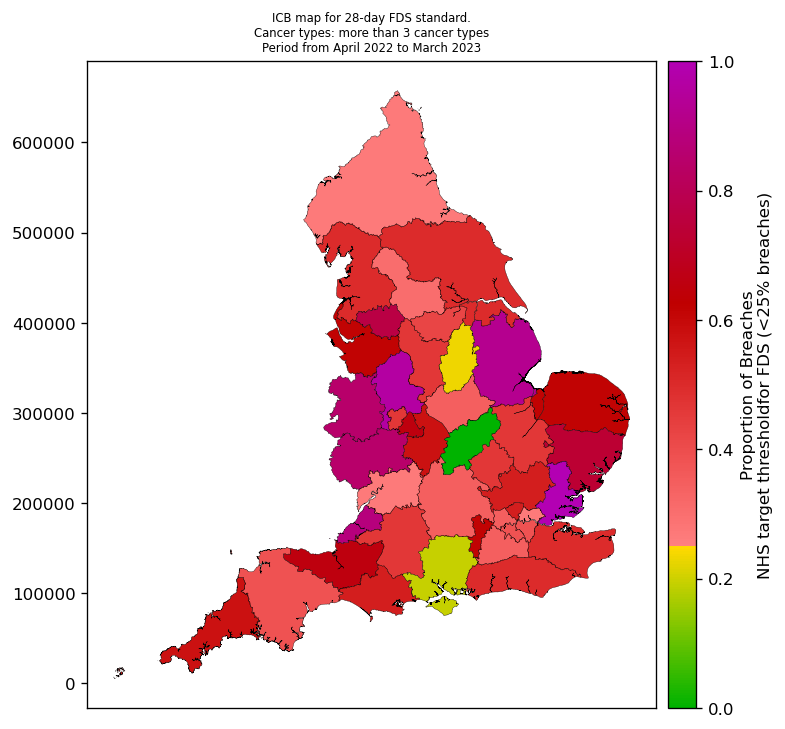

In [12]:
fig, ax = plot_icb_map(data=df_provider, dpi=120)

##### The user can also specify types of cancer that they want to investigate. This will be reflected in the figure title if less than three types of cancer are selected.
##### The same is true for period defined by 'start_month' and 'end_month' keywords in the 'filter' parameter 

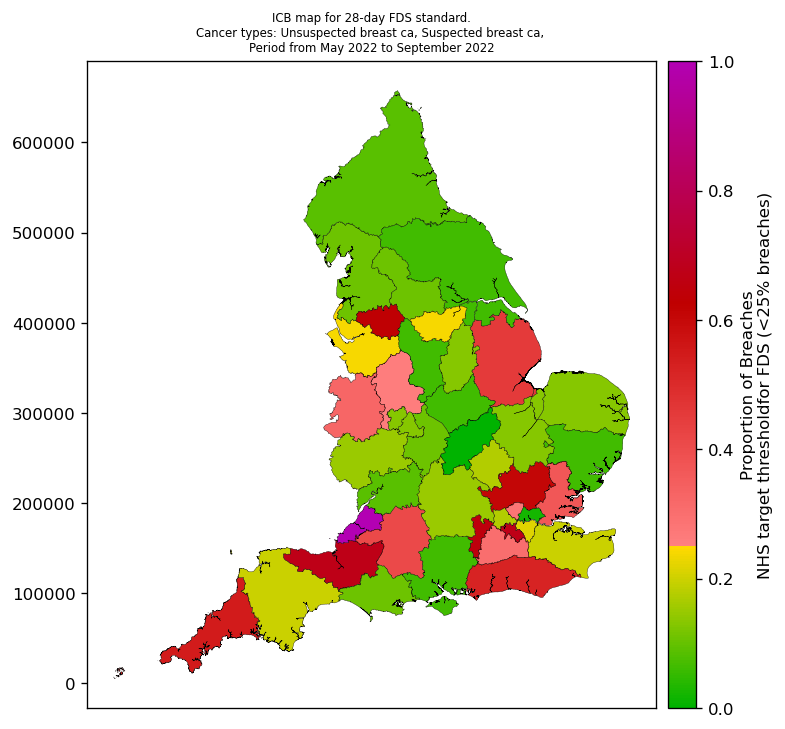

In [16]:
fig, ax = plot_icb_map(data=df_provider,
                       filters={'start_month':'05-2022',
                                'end_month':'09-2022',
                                'standard':'FDS',
                                'cancer_type' :['Suspected_breast_ca','Unsuspected_breast_ca']
                                },
                       dpi=120
                      )

##### Changing the standard by which data is filtered also changes the colourmap to reflect the NHS defined target.
This will also change the title of the figure

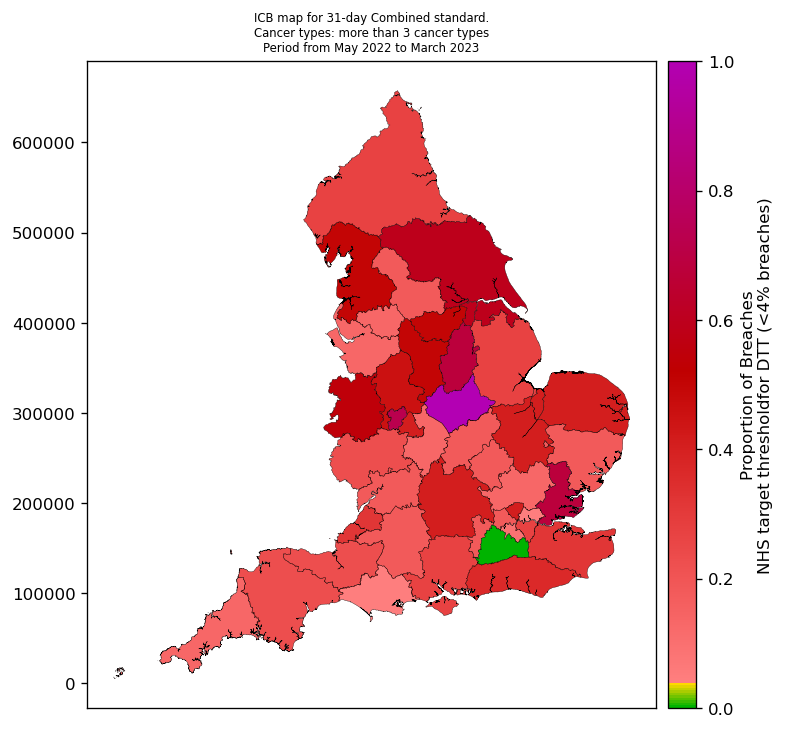

In [25]:
fig, ax = plot_icb_map(data=df_provider,
                       filters={'start_month':'05-2022',
                                'end_month':'04-2023',
                                'standard':'DTT',
                                },
                       dpi=120
                      )